In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
exercise = pd.read_csv('./exercise.csv')
calories = pd.read_csv('./calories.csv')
exercise.head()
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df = exercise.merge(calories, on="User_ID")
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [5]:
df.shape

(15000, 9)

In [6]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df = df.drop(columns=['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp'])
df.head()

,Duration,Calories
0,29.0,231.0
1,14.0,66.0
2,5.0,26.0
3,13.0,71.0
4,10.0,35.0


Text(0.5, 1.0, 'Exercise vs Calories')

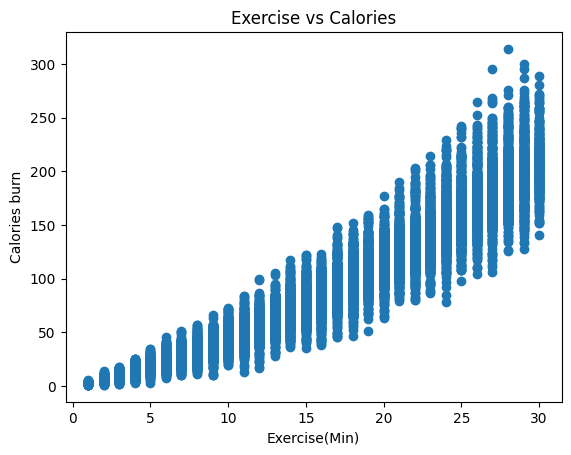

In [9]:
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Exercise(Min)')
plt.ylabel('Calories burn')
plt.title('Exercise vs Calories')

In [10]:
X = df[['Calories']]
y = df['Duration']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Exercise vs Calories')

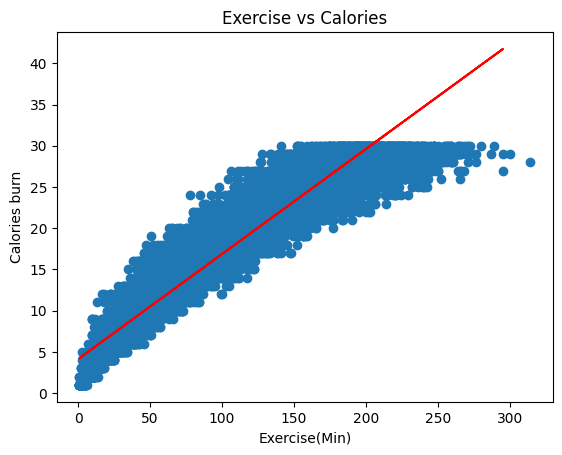

In [14]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Exercise(Min)')
plt.ylabel('Calories burn')
plt.title('Exercise vs Calories')


In [36]:
mse = mean_squared_error(y_test, y_pred)
r_score = r2_score(y_test, y_pred)
mse, r_score

(6.001497621917324, 0.914597915952015)

In [44]:
def predict(cal):
    data = [[cal]]
    time = model.predict(data)
    print(f"Your have to exercise for {time[0]} min for to burn {cal}")
    

In [45]:
predict(1500)

Your have to exercise for 195.43360977998506 min for to burn 1500


C:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
